Setup

(512, 512)


-1

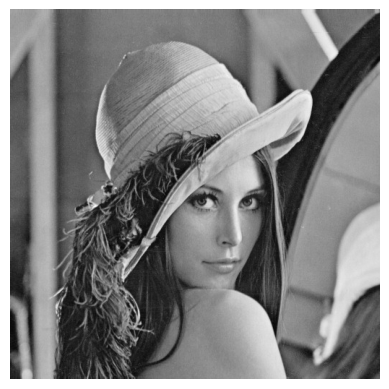

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/lena.jpg')
img =  cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
print(img.shape)
plt.imshow(img, cmap ='gray')
plt.axis('off')
cv2.waitKey(0)

Problem 1

a.)

i.)

Text(0.5, 1.0, 'Guassian Noise')

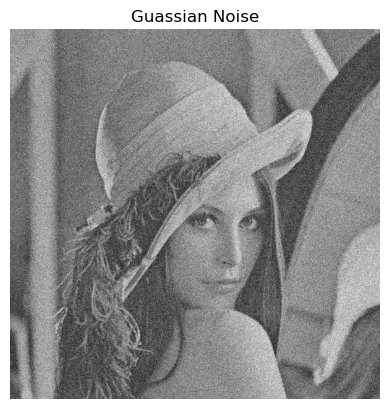

In [2]:
noise_1 = img
mean = 0
stdev = 25
gaussian = np.random.normal(mean, stdev, noise_1.shape)

noisy_image = noise_1 + gaussian

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

#cv2.imshow("Gaussian image", noisy_image)
plt.imshow(noisy_image, cmap ='gray')
plt.axis('off')
plt.title("Guassian Noise")


ii.)

Text(0.5, 1.0, 'Speckle Noise With Uniform Distribution')

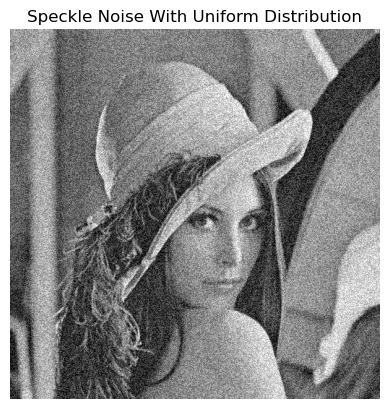

In [3]:
noise_2 = img/255
x, y = img.shape
a = -0.2
b = 0.2
n = np.zeros((x,y), dtype=np.float64)
for i in range(x):
    for j in range(y):
        n[i][j] = np.random.uniform(a,b)

noise_2 = noise_2 + n
noise_2 = np.clip(noise_2, 0, 1)

plt.imshow(noise_2, cmap = 'gray')
noise_2 = noise_2.astype('float32')
plt.axis('off')
plt.title("Speckle Noise With Uniform Distribution")




b.)

Text(0.5, 1.0, 'Median 3 x 3 blur')

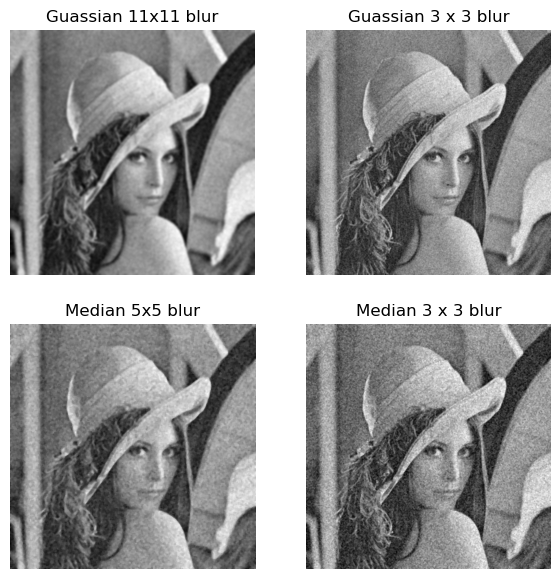

In [4]:
fig = plt.figure(figsize=(7, 7)) 



fig.add_subplot(2, 2, 1) 
gaussianEleven = cv2.GaussianBlur(noisy_image, (11,11), 0)
plt.imshow(gaussianEleven, cmap = 'gray')
plt.axis('off') 
plt.title("Guassian 11x11 blur")

fig.add_subplot(2, 2, 2) 
gaussianThree = cv2.GaussianBlur(noisy_image, (3,3), 0)
plt.imshow(gaussianThree, cmap = 'gray')
plt.axis('off') 
plt.title("Guassian 3 x 3 blur")

fig.add_subplot(2, 2, 3) 
medianFive = cv2.medianBlur(noise_2, 5)
plt.imshow(medianFive, cmap = 'gray')
plt.axis('off') 
plt.title("Median 5x5 blur")

fig.add_subplot(2, 2, 4) 
medianThree = cv2.medianBlur(noise_2, 3)
plt.imshow(medianThree, cmap = 'gray')
plt.axis('off') 
plt.title("Median 3 x 3 blur")






Using the Gaussian blur tended to preserve edges and small details better, however both demonstrated that a lower kernel size resulted in a better overall image quality. Both the gaussian and median blurs needed odd kernel sizes, however the guassian could go much high in kernel size, while median only worked up until a kernel size of 5. 

(-0.5, 511.5, 511.5, -0.5)

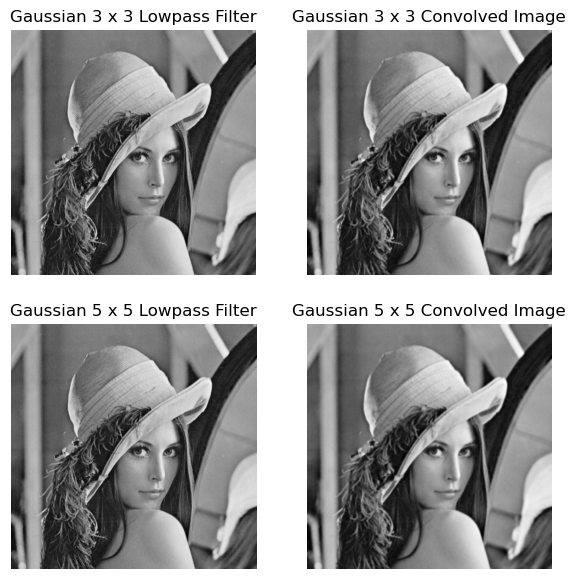

In [5]:
lowpass1 = img
lowpass2 = img

fig = plt.figure(figsize=(7, 7)) 

fig.add_subplot(2, 2, 1) 
cv2.GaussianBlur(lowpass1, (3,3), 0)
plt.imshow(lowpass1, cmap= 'gray')
plt.title("Gaussian 3 x 3 Lowpass Filter")
plt.axis('off')

gThreeMatrix = 1/16 * np.array([[1, 2, 1], 
                                [2, 4, 2], 
                                [1, 2, 1]])

fig.add_subplot(2, 2, 2) 
lowpass1 = cv2.filter2D(lowpass1, -1, gThreeMatrix) 
plt.imshow(lowpass1, cmap= 'gray')
plt.title("Gaussian 3 x 3 Convolved Image")
plt.axis('off')

fig.add_subplot(2, 2, 3) 
cv2.GaussianBlur(lowpass2, (5,5), 0)
plt.imshow(lowpass2, cmap= 'gray')
plt.title("Gaussian 5 x 5 Lowpass Filter")
plt.axis('off')

gFiveMatrix = 1/256 * np.array([[1, 4, 6, 4, 1], 
                                [4, 16, 24, 16,4], 
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16,4],
                                [1, 4, 6, 4, 1]])

fig.add_subplot(2, 2, 4) 
lowpass2 = cv2.filter2D(lowpass2, -1, gFiveMatrix) 
plt.imshow(lowpass2, cmap= 'gray')
plt.title("Gaussian 5 x 5 Convolved Image")
plt.axis('off')

Question 2

a.)
        
i.)

(-0.5, 511.5, 511.5, -0.5)

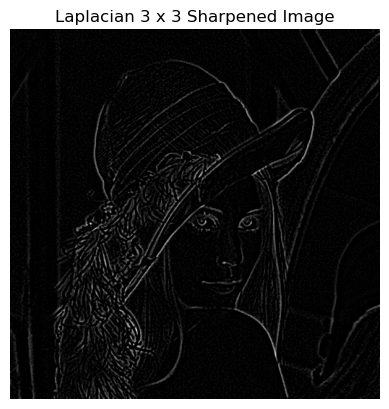

In [74]:
denoisedImg = lowpass2
laplacian = np.array([[0, 1, 0], 
                      [1, -4, 1], 
                      [0, 1, 0]])

laplacianImg = cv2.filter2D(denoisedImg, -1, laplacian)
plt.imshow(laplacianImg, cmap= 'gray')
plt.title("Laplacian 3 x 3 Sharpened Image")
plt.axis('off')

ii.)

(-0.5, 511.5, 511.5, -0.5)

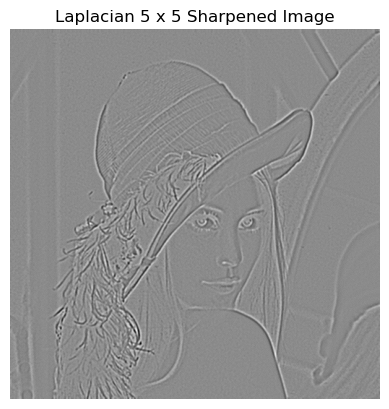

In [75]:
depth = cv2.CV_16S
laplacianImg2 = cv2.Laplacian(denoisedImg, depth, (5,5))
plt.imshow(laplacianImg2, cmap= 'gray')
plt.title("Laplacian 5 x 5 Sharpened Image")
plt.axis('off')

b.)